https://towardsdatascience.com/time-series-forecasting-with-prophet-54f2ac5e722e

In [1]:
from fbprophet import Prophet
import logging

In [2]:
import pandas as pd

In [3]:
logging.getLogger().setLevel(logging.ERROR)

In [4]:
df = pd.read_csv("E:\IIT Kanpur\Placements\Projects\SBI Stock price prediction\\SBIN.NS.csv")

In [5]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,7/17/2015,272.399994,274.0,270.500000,271.100006,265.187134,5571891
1,7/20/2015,272.000000,272.0,266.149994,267.450012,261.616760,6418930


In [6]:
d = pd.DataFrame()

In [7]:
d['ds'] = df['Date']

In [8]:
d['y'] = df['Close']

In [9]:
d.head(2)

,ds,y
0,7/17/2015,271.100006
1,7/20/2015,267.450012


In [10]:
train_df = d[:-50]
valid_df = d[-50:]

In [11]:
d.shape, train_df.shape, valid_df.shape

((1228, 2), (1178, 2), (50, 2))

In [12]:
m = Prophet()
m.fit(train_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future = m.make_future_dataframe(periods = 50)
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-07-17,262.578295,240.145876,295.616850,262.578295,262.578295,6.031859,6.031859,6.031859,-1.264845,-1.264845,-1.264845,7.296703,7.296703,7.296703,0.0,0.0,0.0,268.610154
1,2015-07-20,261.586329,240.457037,295.467545,261.586329,261.586329,7.400089,7.400089,7.400089,-1.077795,-1.077795,-1.077795,8.477884,8.477884,8.477884,0.0,0.0,0.0,268.986418
2,2015-07-21,261.255673,242.934780,295.374725,261.255673,261.255673,7.354552,7.354552,7.354552,-1.555852,-1.555852,-1.555852,8.910404,8.910404,8.910404,0.0,0.0,0.0,268.610226
3,2015-07-22,260.925018,242.312579,298.526990,260.925018,260.925018,7.428033,7.428033,7.428033,-1.923242,-1.923242,-1.923242,9.351274,9.351274,9.351274,0.0,0.0,0.0,268.353051
4,2015-07-23,260.594362,239.045591,296.966783,260.594362,260.594362,8.455739,8.455739,8.455739,-1.337283,-1.337283,-1.337283,9.793023,9.793023,9.793023,0.0,0.0,0.0,269.050102


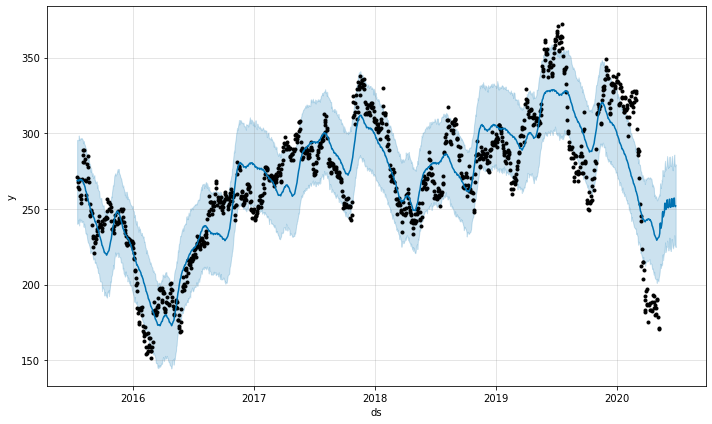

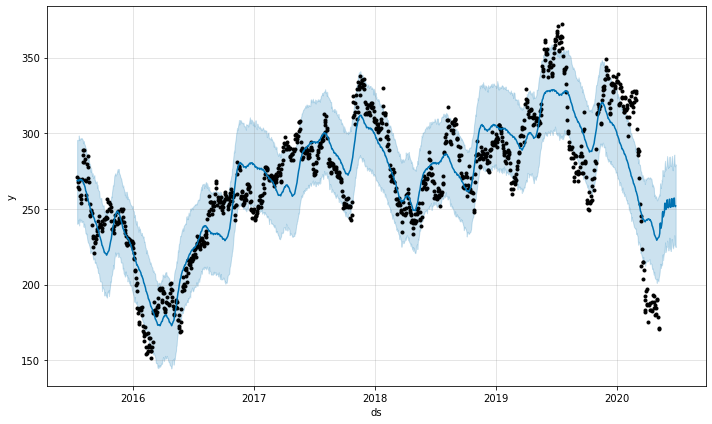

In [14]:
m.plot(forecast)

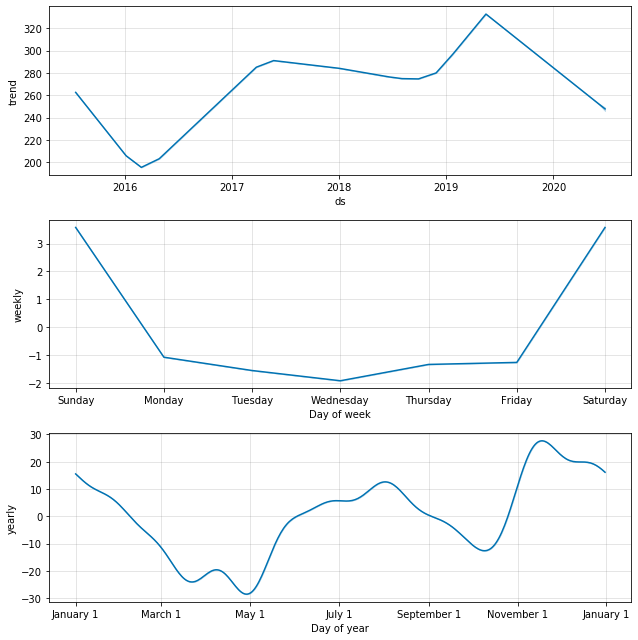

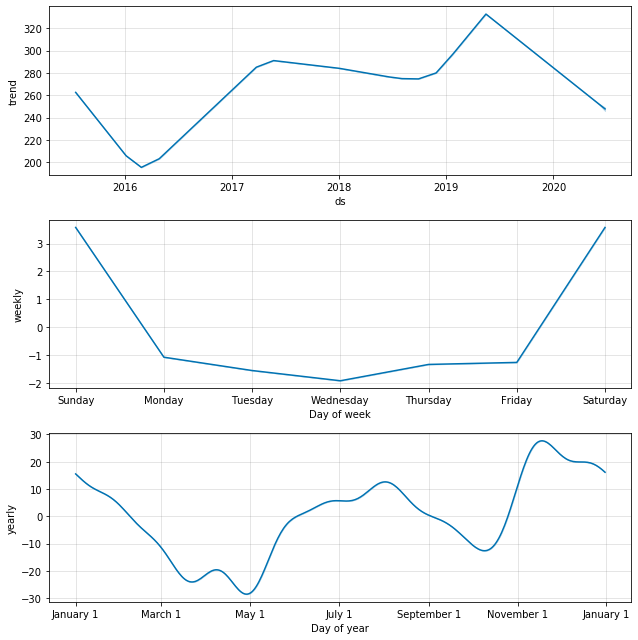

In [15]:
m.plot_components(forecast)